## 데이터 수집

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
from konlpy.tag import Twitter
from lxml import html
from collections import Counter
from datetime import datetime, timedelta

import pandas as pd
import re
import random
import pytagcloud      # requires Korean font support
import webbrowser
import nltk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime

matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
from pylab import figure, axes, pie, title, savefig
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


### 언론사 제목 수집(조선,세계,한겨레)

### URL 입력

In [4]:
urls = []
url = input("url 주소를 입력하세요. \n정치 : http://www.segye.com/newsList/0101010100000?curPage=\n경제 : http://www.segye.com/newsList/0101030100000?curPage=\n사회 : http://www.segye.com/newsList/0101080100000?curPage= \n")
for x in range(1, 1000):
    urls.append('%s%d' % (url, x))

url 주소를 입력하세요. 
정치 : http://www.segye.com/newsList/0101010100000?curPage=
경제 : http://www.segye.com/newsList/0101030100000?curPage=
사회 : http://www.segye.com/newsList/0101080100000?curPage= 
http://www.segye.com/newsList/0101030100000?curPage=


In [5]:
len(urls)

999

In [6]:
urls

['http://www.segye.com/newsList/0101030100000?curPage=1',
 'http://www.segye.com/newsList/0101030100000?curPage=2',
 'http://www.segye.com/newsList/0101030100000?curPage=3',
 'http://www.segye.com/newsList/0101030100000?curPage=4',
 'http://www.segye.com/newsList/0101030100000?curPage=5',
 'http://www.segye.com/newsList/0101030100000?curPage=6',
 'http://www.segye.com/newsList/0101030100000?curPage=7',
 'http://www.segye.com/newsList/0101030100000?curPage=8',
 'http://www.segye.com/newsList/0101030100000?curPage=9',
 'http://www.segye.com/newsList/0101030100000?curPage=10',
 'http://www.segye.com/newsList/0101030100000?curPage=11',
 'http://www.segye.com/newsList/0101030100000?curPage=12',
 'http://www.segye.com/newsList/0101030100000?curPage=13',
 'http://www.segye.com/newsList/0101030100000?curPage=14',
 'http://www.segye.com/newsList/0101030100000?curPage=15',
 'http://www.segye.com/newsList/0101030100000?curPage=16',
 'http://www.segye.com/newsList/0101030100000?curPage=17',
 'http

### 하나의 페이지 테스트

In [7]:
url = urls[0]
html = urlopen(url)
data = BeautifulSoup(html, "lxml")

In [8]:
data

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="세계일보" name="Author"/>
<meta content="세계일보" name="Description"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//img.segye.com/resourcesimages/favicon-segye1.ico" rel="shortcut icon"/>
<link href="//img.segye.com/resources/css/segye2016.css" rel="stylesheet" type="text/css"/>
<title>세상을 보는 눈, 글로벌 미디어 - 세계일보 -</title>
</head>
<!-- Google Tag Manager -->
<body><noscript><iframe height="0" src="//www.googletagmanager.com/ns.html?id=GTM-KDPKKS" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'

In [9]:
data_temp = data.find_all('div', 'newslist_area')

In [10]:
len(data_temp)

1

#### 제목 가져오기

In [11]:
data_title = data_temp[0].find_all('dt', 'title_cr')

In [12]:
data_title[0]

<dt class="title_cr"><a href="/newsView/20181118001744" target="_self">단순노무직 5년 만에 최대폭 감소</a></dt>

In [13]:
data_title[-1]

<dt class="title_cr"><a href="/newsView/20181116002315" target="_self">한국체인스토어협회, 2019년 유통 키워드는'5 Free(프리)'</a></dt>

In [14]:
len(data_title)

20

In [15]:
data_title[0].get_text()

'단순노무직 5년 만에 최대폭 감소'

In [16]:
re.sub('[\'\n\r\t\xa0]', '', data_title[0].get_text())

'단순노무직 5년 만에 최대폭 감소'

#### 날짜 가져오기

In [17]:
data_date = data_temp[0].find_all('span', 'date')

In [18]:
data_date[0]

<span class="date">2018.11.18</span>

In [19]:
data_date[-1]

<span class="date">2018.11.17</span>

In [20]:
len(data_date)

20

In [21]:
data_date[0].get_text()

'2018.11.18'

### 데이터 수집 및 확인

### 언론사(세계)

In [22]:
title = []
date = []
page = 0

start_flag = False
end_flag = False

end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

print("=" * 50)
print("[%s ~ %s] 데이터 수집을 시작합니다.\n" % (end_date, start_date))

start = datetime.now()

for url in urls:
    html = urlopen(url)
    data = BeautifulSoup(html, "lxml")    
    data_temp = data.find_all('div', 'newslist_area')
    
    # 기사 제목 및 날짜 찾기
    data_title = data_temp[0].find_all('dt', 'title_cr')
    data_date = data_temp[0].find_all('span', 'date')
    
    # 데이터수집 체크
    page += 1
    
    if start_flag:
        print("%d 페이지 수집중입니다.... ing" %page, end='')
    
    for x in range(len(data_title)):
        
        # 기사 끝날 날짜 체크 (end_flag 변경)
        if data_date[x].get_text() in end_date:
            temp_date = data_date[x].get_text()
            end_flag = True

        # 기사 끝날 날짜 체크(반복문 out)    
        if end_flag:
            if not(temp_date == data_date[x].get_text()):
                break       
        
        
        if not(start_flag):            
            # 기사 시작 날짜 체크
            if not(data_date[x].get_text() in start_date):            
                continue
            print("%d 페이지 수집중입니다.... ing" %page, end='')
            start_flag = True
        
  
        
        # 기사 제목만 가져오기
        title.append(re.sub('[\'\n\r\t\xa0]', '', data_title[x].get_text()))
   
        # 기사 날짜만 가져오기
        date.append(data_date[x].get_text())
        

    # 데이터 수집 시작 체크
    if not(start_flag):
        continue
        
    # 데이터수집 체크
    print("     [수집완료]")       
          
    
    # 기사 끝날 날짜 체크(반복문 out)  
    if end_flag:
        if not(temp_date == data_date[x].get_text()):
            break 

        
end = datetime.now()
print("=" * 50)
print("데이터 수집을 완료했습니다.")
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
print('총 수집 개수: %d개' %len(title))

시작 날짜를 입력하세요.  ex) 20181007 
20181115
마지막 날짜를 입력하세요.  ex) 20181115 
20181118
[2018.11.15 ~ 2018.11.18] 데이터 수집을 시작합니다.

1 페이지 수집중입니다.... ing     [수집완료]
2 페이지 수집중입니다.... ing     [수집완료]
3 페이지 수집중입니다.... ing     [수집완료]
4 페이지 수집중입니다.... ing     [수집완료]
5 페이지 수집중입니다.... ing     [수집완료]
데이터 수집을 완료했습니다.
총 계산 시간: 0:00:02.477141
총 수집 개수: 89개


In [23]:
len(title)

89

In [24]:
len(date)

89

In [25]:
title[0]

'단순노무직 5년 만에 최대폭 감소'

In [26]:
date[0]

'2018.11.18'

In [27]:
title[-1]

'‘계열사 고의 누락’ 이건희 회장 고발'

In [28]:
date[-1]

'2018.11.15'

### DataFrame 만들기 & 파일로 저장하기

In [29]:
df_temp = {'Title' : title, 'Date' : date}
df = pd.DataFrame(df_temp)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
Title    89 non-null object
Date     89 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [31]:
df.head(10)

,Title,Date
0,단순노무직 5년 만에 최대폭 감소,2018.11.18
1,"BBQ, 치킨값 19일 인상…황금올리브 등 2000원 올라",2018.11.18
2,"첫 업종별 사회적대화, 금융산업위원회 발족",2018.11.18
3,BBQ 윤학종 대표 돌연 사임…지난해 이어 CEO 줄사임,2018.11.18
4,화장품업체들 3분기에도 ‘실적 충격’,2018.11.18
5,"최저기온 영하로 뚝, 겨울추위 본격 시작…보일러관리 4가지 Tip [이슈탐색]",2018.11.18
6,"나 혼자 사는 1인가구, 내 몸은 내가 지킨다 [김현주의 일상 톡톡]",2018.11.18
7,한국 산업용 로봇활용 세계 1위…“일자리와 보완 관계 가능”,2018.11.17
8,반전없는 고용부진…친기업 행보 속도낼까,2018.11.17
9,저출산 속에도 육아 전담 남편수 12개월 연속 늘었다,2018.11.17


In [32]:
df.tail(10)

,Title,Date
79,"9·13대책 발표 두 달…""2억∼3억원 내려도 집 안 팔려""",2018.11.15
80,"""관세는 내렸는데…수입 초콜릿·고가 맥주 가격은 오히려 올라""",2018.11.15
81,㈜한라 천진법인 청산에 따른 243억원 투자금 회수,2018.11.15
82,"오티스, 2018 한국국제승강기엑스포서 차세대 혁신기술 선보여",2018.11.15
83,"도공, 내년 2월부터 고속도로 모든 휴게공간에 무료 와이파이서비스 제공",2018.11.15
84,"코레일, 국내 유일‘철도교통 관제교육 기관’ 지정 박차",2018.11.15
85,"일본 농림어업신용보증기금, 한국 농신보 포항센터 방문",2018.11.15
86,"이베이코리아·우정사업본부, 소상공인·지역경제 활성화 위한 업무협약 체결",2018.11.15
87,[이코노 브리핑] KB금융 대국민안전문화확산 MOU 외,2018.11.15
88,‘계열사 고의 누락’ 이건희 회장 고발,2018.11.15


### 결과 저장하기(주석 처리)

In [33]:
# Thema = input("주제를 입력하세요.  ex) society \n")
# df.to_csv('TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='UTF-8')

## 기사 단어 뽑기

### 저장된 데이터 가져오기

In [2]:
check = input("언론사 데이터를 가져오려면 : 1 \n국민청원 데이터를 가져오려면 : 2\n")

if check == "1":
    Thema = input("주제를 입력하세요.  ex) society \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
    choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")
    end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
    start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]
else:
    thema = input("청원 분야를 입력하세요.\n- 일교/통일/국방 : 36 \n- 일자리 : 37 \n- 인권/성평등 : 49 \n")
    day = input("진행 중 청원 : 1, 만료된 청원 : 2, 전체 청원 : 3\n")
    end_date = input("시작 날짜를 입력하세요.  ex) 181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 181115 \n")
    end_date = end_date[:2] + '.' + end_date[2:4] + '.' + end_date[4:]
    start_date = start_date[:2] + '.' + start_date[2:4] + '.' + start_date[4:]

언론사 데이터를 가져오려면 : 1 
국민청원 데이터를 가져오려면 : 2
2
청원 분야를 입력하세요.
- 일교/통일/국방 : 36 
- 일자리 : 37 
- 인권/성평등 : 49 
36
진행 중 청원 : 1, 만료된 청원 : 2, 전체 청원 : 3
3
시작 날짜를 입력하세요.  ex) 181007 
180101
마지막 날짜를 입력하세요.  ex) 181115 
181116


In [3]:
if check == "1":
    if choose == '1':
        word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
    else:
        word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./TeamMission/president_%s_%s_(%s - %s).csv' % (thema, day, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [4]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20199 entries, 0 to 20198
Data columns (total 3 columns):
Title    20199 non-null object
Date     20199 non-null object
count    20199 non-null object
dtypes: object(3)
memory usage: 473.5+ KB


In [5]:
word.head(10)

,Title,Date,count
0,북한은매번 일본한테 과거사 과거사 사죄요구합니다..,18.11.16,5명
1,문재인 대통령님 국방부 분들 의경 경찰청 없앨거면 군대복무기간 12개월이하로 줄여주세요,18.11.16,2명
2,양구 군인 총상 사고 진상규명하십시오.,18.11.16,102명
3,옥류관 냉면정치...성공할까???,18.11.16,4명
4,중국강경대응,18.11.16,3명
5,양구 군인,18.11.16,342명
6,산이 군대보내주세요,18.11.16,300명
7,GP에서 총상 이게 무슨일입니까?,18.11.16,23명
8,병사가 죽었는데 나라님들은 관심이없네요?,18.11.16,26명
9,국방부는 '자진귀가제도'를 부활 시켜주십시요.,18.11.16,3명


In [6]:
word.tail(10)

,Title,Date,count
20189,"한,미 미래연합사령부 논의 불가 ^^*",18.01.01,0명
20190,"한,미 미래연합사령부 논의 불가 ^^*",18.01.01,0명
20191,군의 사기저하는 백전백패 입니다. ^^*,18.01.01,1명
20192,"한,미 미래연합사령부 논의 불가^^*",18.01.01,0명
20193,끌려가는 외교 걱정된다.,18.01.01,0명
20194,어려운 결단 핵무장,18.01.01,1명
20195,예비역 복학생 등록금을 동일학번 비군복무자 학년별 등록금과 같게 적용해 주세요,18.01.01,2명
20196,‘홍준표법’이라고 불리는 2005년 개정 국적법으로 삭제된 국적법을 왜 다시 환원...,18.01.01,70명
20197,여러분! 2018년 우리의 안보는 우리가 지킵시다.,18.01.01,11명
20198,UAE 관련,18.01.01,0명


In [7]:
len(word)

20199

#### DataFrame -> List -> String

In [8]:
words = str()

start = datetime.now()

if check == '1':
    if choose == '1':
        for i in range(len(list(word['Title']))):
            words += str(list(word['Title'])[i])
    else:
        for i in range(len(list(word['News']))):
            words += str(list(word['News'])[i])
else:
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:12.435712


In [9]:
words[:1000]

"북한은매번 일본한테 과거사 과거사 사죄요구합니다..문재인 대통령님 국방부 분들 의경 경찰청 없앨거면 군대복무기간 12개월이하로 줄여주세요양구 군인 총상 사고 진상규명하십시오.옥류관 냉면정치...성공할까???중국강경대응양구 군인산이 군대보내주세요GP에서 총상 이게 무슨일입니까?병사가 죽었는데 나라님들은 관심이없네요?국방부는  '자진귀가제도'를 부활 시켜주십시요.나라위해 군에 간 아들들을 지켜야 합니다. 지금 양구에서 군인들이 죽어나가고 있습니다. 민간인들이 죽어나가면 누가 책임질건가요?지뢰 다시 설치하고 GP다시 설치하라!!!ㄴ군대도  갈사람 안갈사람 결정해서 가게 해주시고 여자도 군대 가게 해주세요북한인민병역에 남녀차별을 두는 병역법은 위헌법률입니다.여성도 군복무 합시다여호와의 증인들 그냥 국제법 그런거 통용되는 나라로병역법폐지합시다문재인 임명 영국 여성대사 박은하씨 뭐하고 있나요하노이 영사관은 베트남 신부 입국을 허가 해 주십시오북핵, 북미 진실은?, 북미회담,한반도 비핵화영국 대사관의 직무 유기를 해결해 주세요남래퍼 '산이'를 군대보내주십시오영국, 한국인폭행사건 대사관,영사관,처벌 청원래퍼 산이를 군대보내주세요'알바 국가' --- 문재인,  인종석, 주사파들아 국가 경영이 애들 장난이냐북한의핵탄두소형화 작업..산이의 랩 Feminist를 해외에 알리는데에 힘써주십시오일본의 도발과 억지주장에 대한 현 정부의 입장과 앞으로의 계획을 듣고 싶습니다.(말로만 하는 유감, 실망 이런 표현이 아닌 구체적인 방안)청와대 근무자님들 몽땅 북한에서 월급 받으시기를.부쩍 늘어난 해외 순방…靑, 예산 동나자 긴급 예비비 편성...국민세금으로 김정은 선전하려 다니지말라.김정은 핵 사기 치는데 남한 대통령 공범되지 않아야.교황 남북한 방문 요청탈북자들은 정치적으로 이용하면 안됩니다.~~~~~~~~~~~~~~^^^^국민 여러분 호소합니다.북한에 대한 환상,좌파 정부의 속임수에 3번은 믿지 말아 주십시오.청와대 대변인 김의겸의 스펙조작, 문재인의 공정사회북한인권을 정치적으로 이용하

In [10]:
len(words)

490513

#### 트위터로 단어 뽑기

In [ ]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

#### 단어 분류

In [12]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(1382, 7815, 1961)

In [13]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(286, 1869, 645)

In [14]:
for word in one_words:
    print(word, end='\t')

컨	박	늣	톤	코	레	뭘	죽	랩	혈	려	뜸	함	충	면	부	날	곪	예	푼	잠	껍	쉬	배	집	웧	후	뜻	눈	패	셰	칙	혼	관	목	국	비	백	창	번	옥	물	쪽	자	굽	편	벽	댓	강	책	뺨	개	보	선	만	불	반	마	구	쇼	씨	랏	핵	살	압	너	활	택	네	손	협	요	팔	문	걸	쑈	내	범	수	뻔	준	녀	역	표	고	데	위	밖	시	돈	항	옆	실	과	현	처	귤	탓	그	탈	리	철	노	심	또	뿐	간	젠	더	은	막	양	석	글	칠	게	최	뜰	태	바	판	꼭	율	싹	달	놈	건	능	포	앞	급	컵	의	말	숨	란	산	해	죄	남	생	휘	답	두	민	증	임	률	햐	알	을	흉	힘	길	것	맛	총	칼	때	체	전	입	적	회	명	방	오	앱	터	묘	깜	썪	습	차	술	발	주	악	찍	얼	로	몽	법	짝	켐	묵	끝	군	통	월	일	유	뭐	재	를	세	합	망	도	향	삭	균	몾	짓	갑	정	인	끌	청	봉	화	람	치	장	며	웃	약	듯	금	직	병	녘	사	돌	층	벅	즉	제	단	거	겁	기	감	땅	팝	축	온	왕	용	값	북	절	귀	읁	왜	윌	카	밥	큘	나	등	퍼	곳	점	호	짱	잡	쫌	중	줄	피	무	속	김	환	켜	딸	니	좀	분	외	옷	채	쌀	못	머	하	아	꿈	및	이	저	애	드	안	루	

#### stop_words 생성

In [15]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','인천','수원','용인','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [16]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

9295

In [17]:
common_word2 = Counter(nouns)

In [18]:
common_word2 = common_word2.most_common()

In [19]:
wordname = []
wordfreq = []

for i in range(len(common_word2)):
    wordname.append(common_word2[i][0])
    wordfreq.append(common_word2[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [20]:
ecolist.head()

,단어명,빈도수
0,양심,336
1,거부,305
2,병역,299
3,북한,172
4,국민,151


#### stop_word 실행한 데이터 저장

In [21]:
if check == "1":
    if choose == "1":
        ecolist.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
    else:
        ecolist.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
else:
    ecolist.to_csv('TeamMission/president_%s_%s_word_utf_(%s - %s).csv'% (thema, day, end_date, start_date), sep=',', encoding='utf-8')
    print('TeamMission/president_%s_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (thema, day, end_date, start_date))
    

TeamMission/president_36_1_word_utf_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.


#### 워드클라우드 만들기

In [22]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 9295)

In [23]:
token.vocab().most_common(30)

[('양심', 336),
 ('거부', 305),
 ('병역', 299),
 ('북한', 172),
 ('국민', 151),
 ('대한민국', 98),
 ('청원', 87),
 ('군대', 80),
 ('문재인', 76),
 ('국가', 67),
 ('대한', 67),
 ('나라', 56),
 ('판결', 55),
 ('일본', 54),
 ('무죄', 54),
 ('종교', 49),
 ('의무', 49),
 ('남북', 45),
 ('복무', 43),
 ('선언', 43),
 ('김정은', 40),
 ('평양', 40),
 ('참전', 39),
 ('관련', 38),
 ('반대', 38),
 ('예비군', 37),
 ('대체복무', 37),
 ('국방', 37),
 ('처벌', 33),
 ('우리', 32)]

#### 워드클라우드 한글폰트 설정

In [24]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [25]:
data = token.vocab().most_common(1000)
len(data)

1000

In [26]:
data[:10]

[('양심', 336),
 ('거부', 305),
 ('병역', 299),
 ('북한', 172),
 ('국민', 151),
 ('대한민국', 98),
 ('청원', 87),
 ('군대', 80),
 ('문재인', 76),
 ('국가', 67)]

#### data를 딕셔너리 형태로 변환

In [27]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

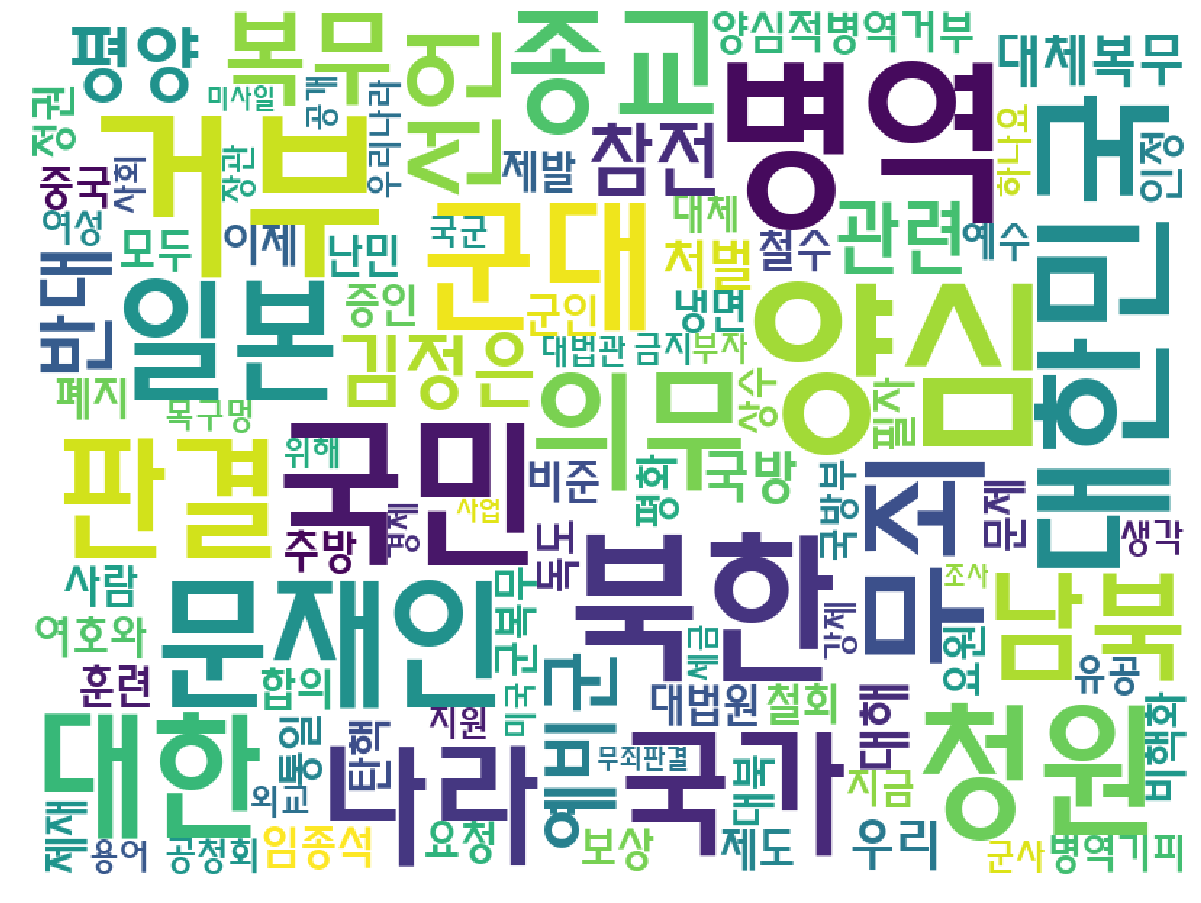

In [29]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
#     "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if check == '1':
    if choose == '1':
        save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
    else:
        save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/president_%s_%s_(%s - %s).png' % (thema, day, end_date, start_date)
    
plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

### 국민청원 데이터 정리

#### 데이터 읽어오기

In [2]:
president_36_1 = pd.read_csv('./TeamMission/president_36_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_36_2 = pd.read_csv('./TeamMission/president_36_2_(18.01.01 - 18.10.17).csv', sep=(','), encoding='utf-8')
president_37_1 = pd.read_csv('./TeamMission/president_37_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_37_2 = pd.read_csv('TeamMission/president_37_2_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_49_1 = pd.read_csv('./TeamMission/president_49_1_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')
president_49_2 = pd.read_csv('TeamMission/president_49_2_(18.01.01 - 18.11.16).csv', sep=(','), encoding='utf-8')

In [3]:
president_36_1.head()

,Unnamed: 0,Title,Date,count
0,0,북한은매번 일본한테 과거사 과거사 사죄요구합니다..,18.11.16,5명
1,1,문재인 대통령님 국방부 분들 의경 경찰청 없앨거면 군대복무기간 12개월이하로 줄여주세요,18.11.16,2명
2,2,양구 군인 총상 사고 진상규명하십시오.,18.11.16,102명
3,3,옥류관 냉면정치...성공할까???,18.11.16,4명
4,4,중국강경대응,18.11.16,3명


#### 불필요한 열 제거

In [4]:
president_36_1.drop('Unnamed: 0',axis=1, inplace=True)
president_36_2.drop('Unnamed: 0',axis=1, inplace=True)
president_37_1.drop('Unnamed: 0',axis=1, inplace=True)
president_37_2.drop('Unnamed: 0',axis=1, inplace=True)
president_49_1.drop('Unnamed: 0',axis=1, inplace=True)
president_49_2.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
president_36_1.head()

,Title,Date,count
0,북한은매번 일본한테 과거사 과거사 사죄요구합니다..,18.11.16,5명
1,문재인 대통령님 국방부 분들 의경 경찰청 없앨거면 군대복무기간 12개월이하로 줄여주세요,18.11.16,2명
2,양구 군인 총상 사고 진상규명하십시오.,18.11.16,102명
3,옥류관 냉면정치...성공할까???,18.11.16,4명
4,중국강경대응,18.11.16,3명


In [6]:
len(president_36_1), len(president_36_2)

(1977, 18222)

In [7]:
len(president_37_1), len(president_37_2)

(1653, 15820)

In [8]:
len(president_49_1), len(president_49_2)

(2313, 20582)

#### 데이터 합치기

In [9]:
president_36_3 = pd.concat([president_36_1, president_36_2])
president_37_3 = pd.concat([president_37_1, president_37_2])
president_49_3 = pd.concat([president_49_1, president_49_2])

In [10]:
president_36_3.head()

,Title,Date,count
0,북한은매번 일본한테 과거사 과거사 사죄요구합니다..,18.11.16,5명
1,문재인 대통령님 국방부 분들 의경 경찰청 없앨거면 군대복무기간 12개월이하로 줄여주세요,18.11.16,2명
2,양구 군인 총상 사고 진상규명하십시오.,18.11.16,102명
3,옥류관 냉면정치...성공할까???,18.11.16,4명
4,중국강경대응,18.11.16,3명


In [11]:
president_36_3.tail()

,Title,Date,count
18217,어려운 결단 핵무장,18.01.01,1명
18218,예비역 복학생 등록금을 동일학번 비군복무자 학년별 등록금과 같게 적용해 주세요,18.01.01,2명
18219,‘홍준표법’이라고 불리는 2005년 개정 국적법으로 삭제된 국적법을 왜 다시 환원...,18.01.01,70명
18220,여러분! 2018년 우리의 안보는 우리가 지킵시다.,18.01.01,11명
18221,UAE 관련,18.01.01,0명


In [12]:
len(president_36_3), len(president_37_3), len(president_49_3)

(20199, 17473, 22895)

In [13]:
int(list(president_36_3['count'])[0][:-1].replace(',', ''))

5

#### 데이터 저장

In [14]:
president_36_3.to_csv('./TeamMission/president_36_3_(18.01.01 - 18.11.16).csv', sep=',', encoding='UTF-8')
print('./TeamMission/president_36_3_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.')
president_37_3.to_csv('./TeamMission/president_37_3_(18.01.01 - 18.11.16).csv', sep=',', encoding='UTF-8')
print('./TeamMission/president_37_3_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.')
president_49_3.to_csv('./TeamMission/president_49_3_(18.01.01 - 18.11.16).csv', sep=',', encoding='UTF-8')
print('./TeamMission/president_49_3_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.')

./TeamMission/president_36_3_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.
./TeamMission/president_37_3_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.
./TeamMission/president_49_3_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.


#### 청원 참여인원 합계 구하기

In [15]:
sum_count_36 = 0
sum_count_37 = 0
sum_count_49 = 0

for x in range(len(president_36_3)):
    sum_count_36 += int(list(president_36_3['count'])[x][:-1].replace(',', ''))
    
for x in range(len(president_37_3)):
    sum_count_37 += int(list(president_37_3['count'])[x][:-1].replace(',', ''))
    
for x in range(len(president_49_3)):
    sum_count_49 += int(list(president_49_3['count'])[x][:-1].replace(',', ''))  
    

In [16]:
sum_count_36, sum_count_37, sum_count_49

(3088617, 734551, 9391430)

### 네이버 데이터랩을 활용한 검색지수 산출

In [17]:
%matplotlib inline

In [18]:
thema = input("분야를 입력하세요. \n정치 : 36, 경제 : 37, 사회 : 49 \n")

분야를 입력하세요. 
정치 : 36, 경제 : 37, 사회 : 49 
36


In [19]:
data1 = pd.read_excel('./TeamMission/datalab_%s_1_1.xlsx' %thema)
data2 = pd.read_excel('./TeamMission/datalab_%s_1_2.xlsx' %thema)

In [20]:
data1.head()

,날짜,남북통일,날짜.1,한반도안보
0,2018-01-01,15.61909,2018-01-01,13.13730
1,2018-01-02,27.78527,2018-01-02,12.57081
2,2018-01-03,44.21364,2018-01-03,13.13730
3,2018-01-04,16.02373,2018-01-04,13.27218
4,2018-01-05,100.00000,2018-01-05,11.59967


In [21]:
data2.head()

,날짜,남북통일,날짜.1,한반도안보
0,2018-01-01,23.66790,2018-01-01,34.69640
1,2018-01-02,35.06815,2018-01-02,42.25526
2,2018-01-03,38.41387,2018-01-03,50.68153
3,2018-01-04,39.03345,2018-01-04,45.22924
4,2018-01-05,37.42255,2018-01-05,44.48574


In [22]:
data1.tail()

,날짜,남북통일,날짜.1,한반도안보
317,2018-11-14,14.18937,2018-11-14,18.28972
318,2018-11-15,11.81548,2018-11-15,16.64418
319,2018-11-16,11.68060,2018-11-16,15.83490
320,2018-11-17,10.19692,2018-11-17,11.08713
321,2018-11-18,12.00431,2018-11-18,14.70191


In [23]:
data2.tail()

,날짜,남북통일,날짜.1,한반도안보
317,2018-11-14,42.75092,2018-11-14,61.46220
318,2018-11-15,43.74225,2018-11-15,56.75340
319,2018-11-16,38.66171,2018-11-16,44.73358
320,2018-11-17,29.24411,2018-11-17,40.64436
321,2018-11-18,40.39653,2018-11-18,46.34448


In [24]:
len(data1), len(data2)

(322, 322)

In [25]:
data1['통합'] = data1[data1.columns[1]] + data1[data1.columns[3]]
data2['통합'] = data2[data2.columns[1]] + data2[data2.columns[3]]

In [26]:
data1.head()

,날짜,남북통일,날짜.1,한반도안보,통합
0,2018-01-01,15.61909,2018-01-01,13.13730,28.75639
1,2018-01-02,27.78527,2018-01-02,12.57081,40.35608
2,2018-01-03,44.21364,2018-01-03,13.13730,57.35094
3,2018-01-04,16.02373,2018-01-04,13.27218,29.29591
4,2018-01-05,100.00000,2018-01-05,11.59967,111.59967


In [27]:
data2.head()

,날짜,남북통일,날짜.1,한반도안보,통합
0,2018-01-01,23.66790,2018-01-01,34.69640,58.36430
1,2018-01-02,35.06815,2018-01-02,42.25526,77.32341
2,2018-01-03,38.41387,2018-01-03,50.68153,89.09540
3,2018-01-04,39.03345,2018-01-04,45.22924,84.26269
4,2018-01-05,37.42255,2018-01-05,44.48574,81.90829


In [28]:
data1['날짜'] = data1['날짜'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
data2['날짜'] = data2['날짜'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [29]:
data2.head()

,날짜,남북통일,날짜.1,한반도안보,통합
0,2018-01-01,23.66790,2018-01-01,34.69640,58.36430
1,2018-01-02,35.06815,2018-01-02,42.25526,77.32341
2,2018-01-03,38.41387,2018-01-03,50.68153,89.09540
3,2018-01-04,39.03345,2018-01-04,45.22924,84.26269
4,2018-01-05,37.42255,2018-01-05,44.48574,81.90829


In [30]:
data1['지수차'] = data1['통합'] - data2['통합']

In [31]:
data1.tail()

,날짜,남북통일,날짜.1,한반도안보,통합,지수차
317,2018-11-14,14.18937,2018-11-14,18.28972,32.47909,-71.73403
318,2018-11-15,11.81548,2018-11-15,16.64418,28.45966,-72.03599
319,2018-11-16,11.68060,2018-11-16,15.83490,27.51550,-55.87979
320,2018-11-17,10.19692,2018-11-17,11.08713,21.28405,-48.60442
321,2018-11-18,12.00431,2018-11-18,14.70191,26.70622,-60.03479


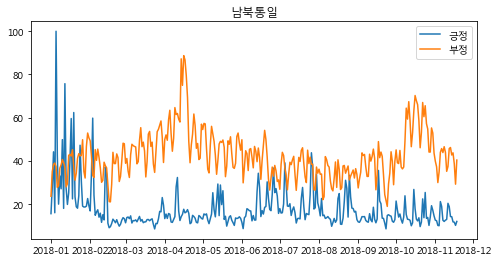

In [32]:
plt.figure(figsize=(8,4))
plt.plot(data1['날짜'], data1[data1.columns[1]], label='긍정')
plt.plot(data2['날짜'], data2[data2.columns[1]], label='부정')
plt.title(data1.columns[1])
plt.legend()
plt.show()

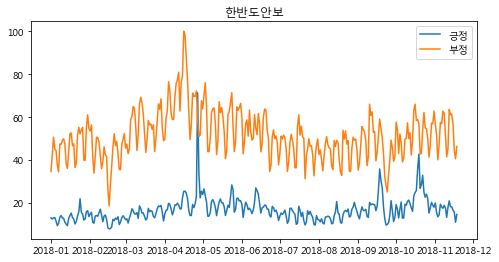

In [33]:
plt.figure(figsize=(8,4))
plt.plot(data1['날짜'], data1[data1.columns[3]], label='긍정')
plt.plot(data2['날짜'], data2[data2.columns[3]], label='부정')
plt.title(data1.columns[3])
plt.legend()
plt.show()

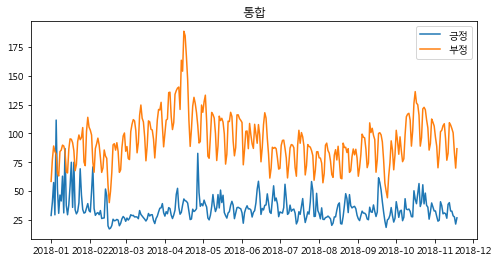

In [34]:
plt_1 = plt.figure(figsize=(8,4))
plt.plot(data1['날짜'], data1[data1.columns[4]], label='긍정')
plt.plot(data2['날짜'], data2[data2.columns[4]], label='부정')
plt.title(data1.columns[4])
plt.legend()
plt.show()

In [35]:
plt_1.savefig(r'./images/datalab_%s_1.png' %thema, format='png')

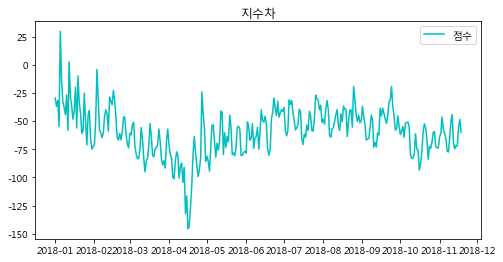

In [36]:
plt_2 = plt.figure(figsize=(8,4))
plt.plot(data1['날짜'], data1[data1.columns[5]], 'c', label='점수')
plt.title(data1.columns[5])
plt.legend()
plt.show()

In [37]:
plt_2.savefig(r'./images/datalab_%s_2.png' %thema, format='png')

In [38]:
data1.head()

,날짜,남북통일,날짜.1,한반도안보,통합,지수차
0,2018-01-01,15.61909,2018-01-01,13.13730,28.75639,-29.60791
1,2018-01-02,27.78527,2018-01-02,12.57081,40.35608,-36.96733
2,2018-01-03,44.21364,2018-01-03,13.13730,57.35094,-31.74446
3,2018-01-04,16.02373,2018-01-04,13.27218,29.29591,-54.96678
4,2018-01-05,100.00000,2018-01-05,11.59967,111.59967,29.69138


In [39]:
data1.to_csv('./TeamMission/datalab_%s_1_3.csv' %thema, sep=',', encoding='UTF-8')
print('./TeamMission/datalab_%s_1_3.csv 파일을 생성했습니다.')

./TeamMission/datalab_%s_1_3.csv 파일을 생성했습니다.


#### 지수차 그래프 그리기

In [40]:
data1 = pd.read_csv('./TeamMission/datalab_36_1_3.csv')
data2 = pd.read_csv('./TeamMission/datalab_37_1_3.csv')
data3 = pd.read_csv('./TeamMission/datalab_49_1_3.csv')

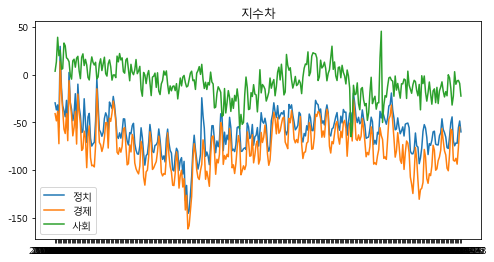

In [41]:
plt_1 = plt.figure(figsize=(8,4))
plt.plot(data1['날짜'], data1[data1.columns[6]], label='정치')
plt.plot(data2['날짜'], data2[data2.columns[6]], label='경제')
plt.plot(data3['날짜'], data3[data3.columns[6]], label='사회')
plt.title(data1.columns[6])
plt.legend()
plt.show()

In [42]:
plt_2.savefig(r'./images/datalab_%s_3.png' %thema, format='png')

### 점수화

##### 점수지표
- 청원 점수 : 25%
- 네이버랩 검색지수 : 25%
- 정량지표(목표달성도) : 50%

#### 청원 점수

In [43]:
len(president_36_3), len(president_37_3), len(president_49_3)

(20199, 17473, 22895)

In [44]:
sum_count_36, sum_count_37, sum_count_49

(3088617, 734551, 9391430)

#### 네이버랩 검색지수(평균)

In [45]:
round(sum(data1[data1.columns[6]]) / len(data1[data1.columns[6]]), 3), round(sum(data2[data2.columns[6]]) / len(data2[data2.columns[6]]),3), round(sum(data3[data3.columns[6]]) / len(data3[data3.columns[6]]), 3)

(-59.178, -75.999, -6.988)

#### 정량지표(목표달성도)

2018년 예산안 중 실제 이행예정 중이였던 정책들과
2018년도 실제 수행된 정책들을 비교해서 점수화

cf) 2018년 기획재정부 정책 예산안.pdf 참고

- 정치 : -10점
- 경제 : -30점
- 사회 : -20점

### 총평

정치 : 100 - (6.3 + 10.25 + 5)

경제 : 100 - (1.75 + 13.25 + 15)

사회 : 100 - (16.95 + 1.5 + 10)

In [50]:
100 - (6.3 + 10.25 + 5)

78.45

In [52]:
100 - (1.75 + 13.25 + 15)

70.0

In [53]:
100 - (16.95 + 1.5 + 10)

71.55

In [54]:
(78.45+70.0+71.55)/3

73.33333333333333

끝~